In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
%matplotlib inline

In [2]:
df = pd.read_csv('insurance.csv')
df.head()

age     sex   bmi  children smoker     region  expenses
0   19  female  27.9         0    yes  southwest  16884.92
1   18    male  33.8         1     no  southeast   1725.55
2   28    male  33.0         3     no  southeast   4449.46
3   33    male  22.7         0     no  northwest  21984.47
4   32    male  28.9         0     no  northwest   3866.86

In [3]:
df.shape

(1338, 7)

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
expenses    0
dtype: int64

In [5]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
expenses    float64
dtype: object

In [6]:
df.describe()

age          bmi     children      expenses
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.665471     1.094918  13270.422414
std      14.049960     6.098382     1.205493  12110.011240
min      18.000000    16.000000     0.000000   1121.870000
25%      27.000000    26.300000     0.000000   4740.287500
50%      39.000000    30.400000     1.000000   9382.030000
75%      51.000000    34.700000     2.000000  16639.915000
max      64.000000    53.100000     5.000000  63770.430000

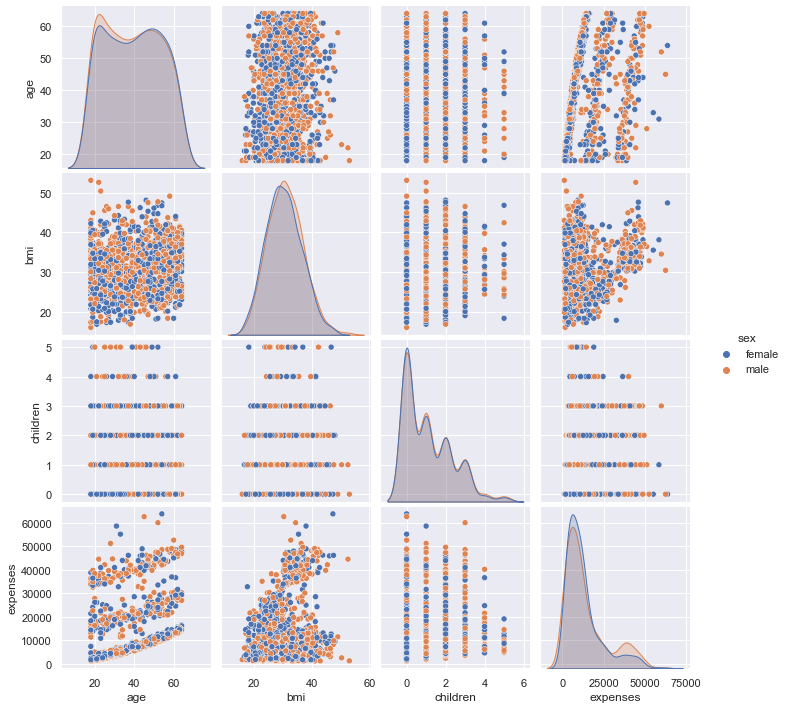

In [7]:
sns.pairplot(df, diag_kind='kde', hue='sex');

In [8]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [9]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [12]:
df_dummies = pd.get_dummies(df, drop_first=True)
df_dummies.head()

age   bmi  children  expenses  sex_male  smoker_yes  region_northwest  \
0   19  27.9         0  16884.92         0           1                 0   
1   18  33.8         1   1725.55         1           0                 0   
2   28  33.0         3   4449.46         1           0                 0   
3   33  22.7         0  21984.47         1           0                 1   
4   32  28.9         0   3866.86         1           0                 1   

   region_southeast  region_southwest  
0                 0                 1  
1                 1                 0  
2                 1                 0  
3                 0                 0  
4                 0                 0

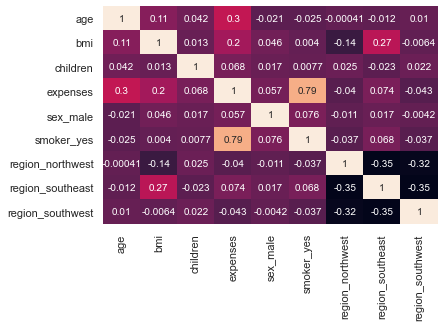

In [13]:
# looking for multicolinearity
corrmat = df_dummies.corr()

sns.heatmap(corrmat, annot=True, cbar=False,
           xticklabels=list(df_dummies.columns),
           yticklabels=list(df_dummies.columns));

In [14]:
X = df_dummies.drop('expenses', axis=1)
y = df['expenses']

In [15]:
X

age   bmi  children  sex_male  smoker_yes  region_northwest  \
0      19  27.9         0         0           1                 0   
1      18  33.8         1         1           0                 0   
2      28  33.0         3         1           0                 0   
3      33  22.7         0         1           0                 1   
4      32  28.9         0         1           0                 1   
...   ...   ...       ...       ...         ...               ...   
1333   50  31.0         3         1           0                 1   
1334   18  31.9         0         0           0                 0   
1335   18  36.9         0         0           0                 0   
1336   21  25.8         0         0           0                 0   
1337   61  29.1         0         0           1                 1   

      region_southeast  region_southwest  
0                    0                 1  
1                    1                 0  
2                    1                 0  
3                    0                 0  
4                    0                 0  
...                ...               ...  
1333                 0                 0  
1334                 0                 0  
1335                 1                 0  
1336                 0                 1  
1337                 0                 0  

[1338 rows x 8 columns]

In [16]:
y

0       16884.92
1        1725.55
2        4449.46
3       21984.47
4        3866.86
          ...   
1333    10600.55
1334     2205.98
1335     1629.83
1336     2007.95
1337    29141.36
Name: expenses, Length: 1338, dtype: float64

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

In [18]:
cross_val_score(LinearRegression(), X, y, cv=5)

array([0.76148215, 0.70650918, 0.7780752 , 0.73273236, 0.75559751])

In [19]:
cross_val_score(RandomForestRegressor(max_depth=5, n_estimators=10000, random_state=0), X, y, cv=5)

array([0.88085061, 0.80033112, 0.89145356, 0.84237761, 0.86972549])

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [21]:
rf_reg = RandomForestRegressor(max_depth=5, n_estimators=10000, random_state=0)

In [22]:
rf_reg.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, n_estimators=10000, random_state=0)

In [23]:
y_pred = rf_reg.predict(X_test)

In [24]:
rf_reg.score(X_test, y_test)

0.8957191168265807

In [25]:
person_values = []

In [26]:
age = int(input('Please enter your age:'))

Please enter your age: 19


In [27]:
sex = input('Please enter your gender:')

Please enter your gender: female


In [28]:
bmi = float(input('please enter your bmi'))

please enter your bmi 27.9


In [29]:
children = int(input('How many children do you have?:'))

How many children do you have?: 0


In [30]:
smoker = input('Are you a smoker?')

Are you a smoker? yes


In [31]:
region = input('Enter your region:')

Enter your region: southwest


In [32]:
sex_male = 1 if sex == 'male' else 0
smoker_yes = 1 if smoker == 'yes' else 0

if region == 'northwest':
    regions = [1, 0, 0]
elif region == 'southeast':
    regions = [0, 1, 0]
elif region == 'southwest':
    regions = [0, 0, 1]
else:
    regions = [0, 0, 0]

person_values = [age, bmi, children, sex_male, smoker_yes]
final_values = person_values + regions

In [33]:
round(rf_reg.predict([final_values])[0],2)

17625.89

In [34]:
import pickle
with open('insurance_expenses_model.pickle', 'wb') as f:
    pickle.dump(rf_reg, f)

In [35]:
import json

columns = {
    'data_columns' : [col.lower() for col in X.columns]
}

with open('columns.json', 'w') as f:
   f.write(json.dumps(columns))